<a href="https://colab.research.google.com/github/TaehyunRoh/ML_LAB/blob/master/2_3_5_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [33]:
! pip install mglearn

    100% |████████████████████████████████| 542kB 21.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


### 결정 트리

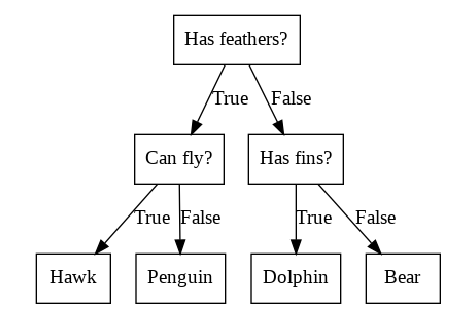

In [0]:
mglearn.plots.plot_animal_tree()

#### 결정 트리 만들기

- 2차원 데이터셋 분류 
- 각각 50개
- 연속적인 값 분류 "특성 i는 값 a보다 큰가?"

- 루트 노드(root node) : 클래스를 잘 나누는 가장 상위 노드
- 순수 노드(pure node) : 타깃 하나로만 이뤄진 리프 노드

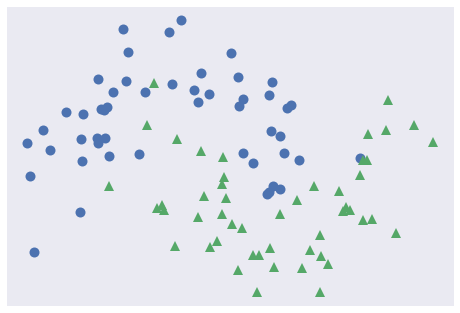

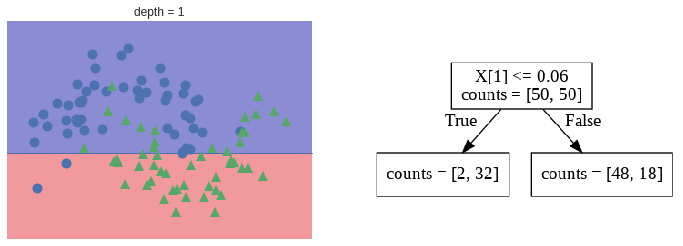

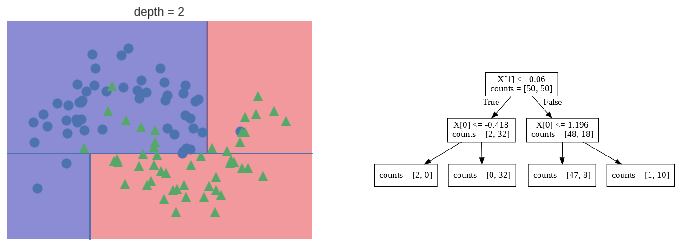

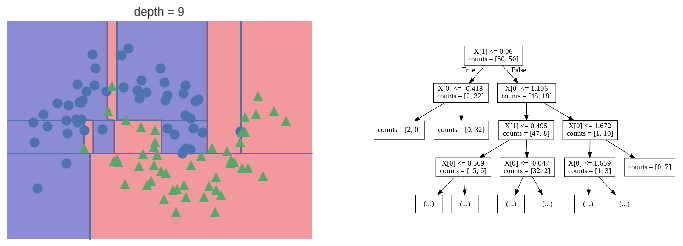

In [0]:
mglearn.plots.plot_tree_progressive()

#### 결정 트리의 복잡도 제어하기

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.svm.libsvm import cross_validation
import scipy.sparse as sp
from sklearn.model_selection import train_test_split

In [3]:
! pip install --upgrade sklearn

Requirement already up-to-date: sklearn in /usr/local/lib/python3.6/dist-packages (0.0)


- train data의 과대적합(이상치에 너무 민감)


- Pruning


> 1) pre-pruning


> 2) post-pruning(pruning)

##유방암데이터
- train_test_split 데이터 분할(표본을 무작위로 선택)

In [19]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)


tree = DecisionTreeClassifier(random_state=0)
#scikit-learn에서 제공 DecisionTreeRegressor, pre-pruning만 지원

tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [23]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


#### 결정 트리 분석

In [0]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

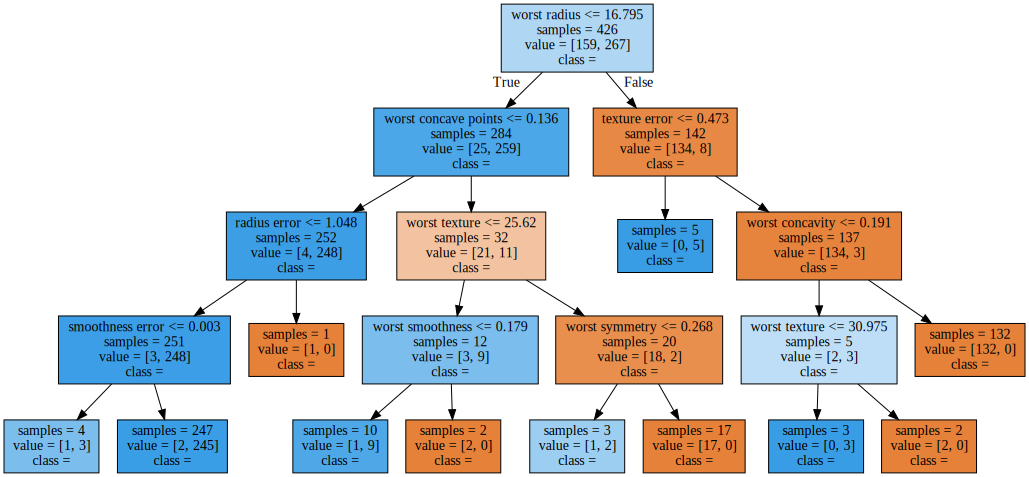

In [25]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### 트리의 특성 중요도

- 특성 중요도(Feature importance)

> 트리가 어떻게 작동하는지 요약하는 속성들 확인



> feature importance가 낮다고 중요하지 않은 feature가 아님




In [26]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


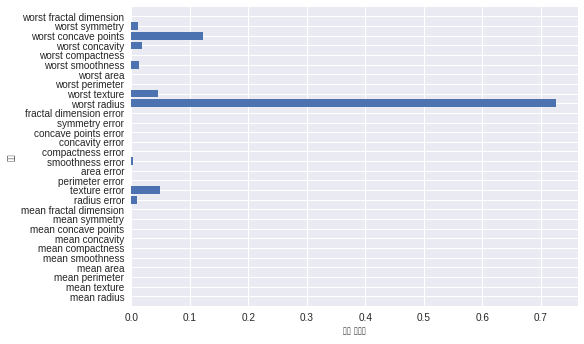

In [35]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


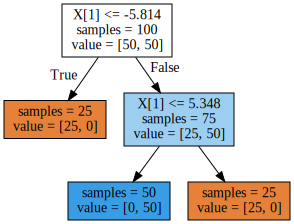

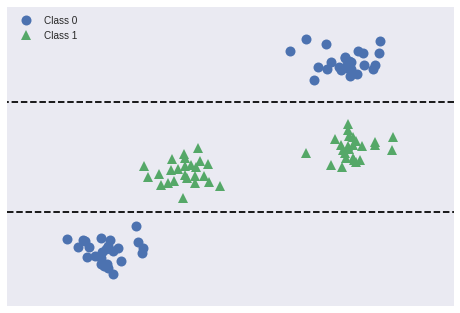

In [37]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

- 위에서 보는바와 같이 단순하계 비례 반비례 관계가 아님
- 이러한 것은 DecisionTreeRegressor에서도 발생
- 외삽(extrapolation)발생

Text(0, 0.5, 'price ($/Mbyte)')

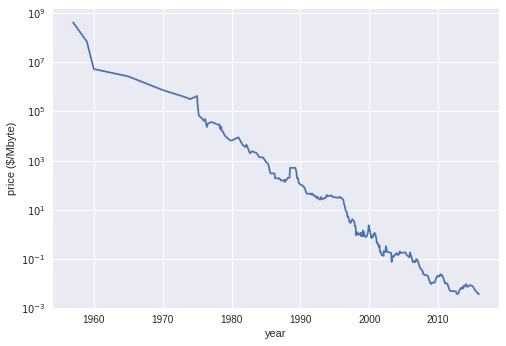

In [41]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(ram_prices.date, ram_prices.price)#y에 로그 스케일
plt.xlabel("year")
plt.ylabel("price ($/Mbyte)")

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

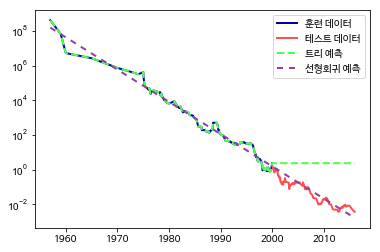

In [0]:
plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()

#### 장단점과 파라미터

> 결정 트리에서 모델 복잡도를 조절 -> 사전 가지치기 매개변수
> - max_depth, max_leaf_nodes,min_samples_leaf



---



> **장점**


> 1.만들어진 모델을 쉽게 시각화할 수 있어서 비전문가도 이해하기 쉽다.


> 2.스케일의 구애를 받지 않는다.(정규화 과정이 필요 없다. 이진과 연속 특성이 혼합되어 있어도 잘 됨)



---


> **단점**

> 1.pruming을 사용함에도 불구하고 과대적합 경향(일반화 성능이 좋지 않음)


> 2.앙상블기법으로 극복하려고 함



